# Random Forest: 호텔 예약 취소 케이스 예측모델 만들기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/DSNote/fastcampus/raw/main/hotel.csv'

In [10]:
url = 'https://github.com/DSNote/fastcampus/raw/main/hotel.csv'

In [11]:
hotel_df = pd.read_csv(url)
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [13]:
hotel_df = hotel_df.drop(['arrival_date_day_of_month', 'arrival_date_week_number', 'reservation_status_date', 'name','email','phone-number','credit_card'], axis=1)
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


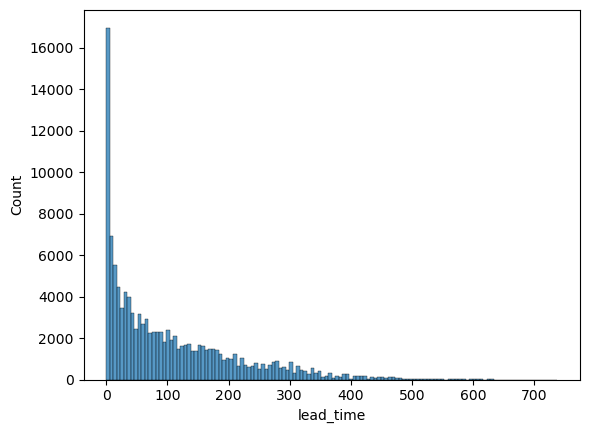

In [14]:
sns.histplot(data=hotel_df,x='lead_time')
plt.show()

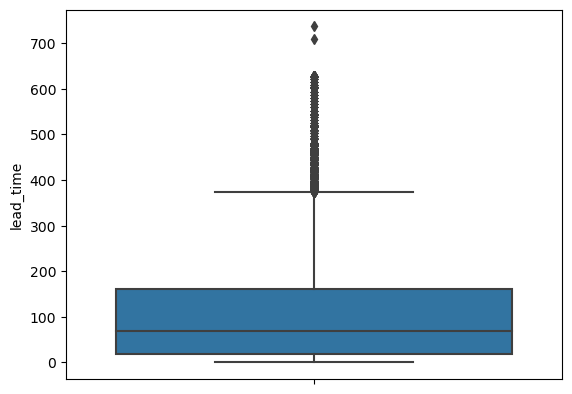

In [15]:
sns.boxplot(data=hotel_df, y='lead_time')
plt.show()

In [16]:
hotel_df[hotel_df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
14969,Resort Hotel,0,195,2017,March,4,6,2,0.0,0,...,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0


In [17]:
hotel_df = hotel_df[hotel_df['adr']>=0]
hotel_df[hotel_df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests


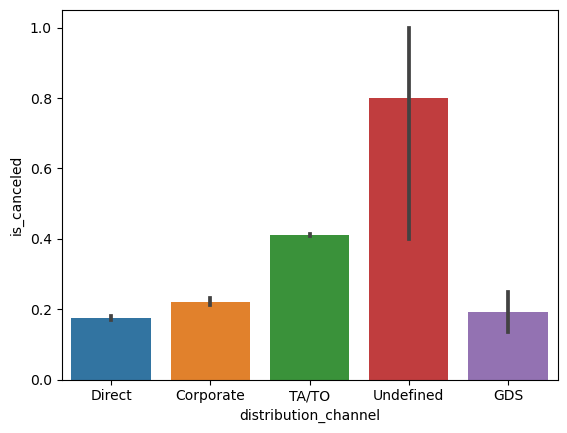

In [18]:
sns.barplot(data=hotel_df,x='distribution_channel', y='is_canceled')
plt.show()

In [19]:
hotel_df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14644
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

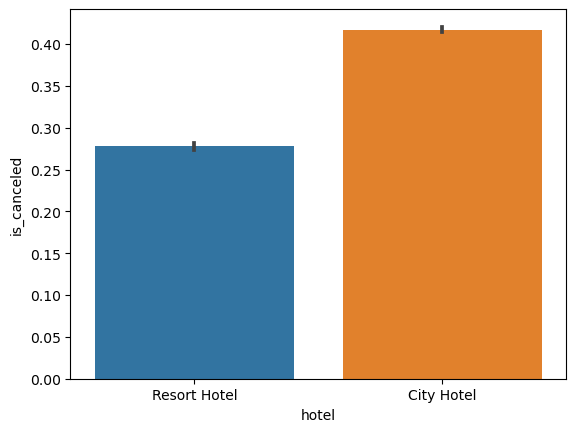

In [20]:
sns.barplot(data=hotel_df, x='hotel', y='is_canceled')
plt.show()

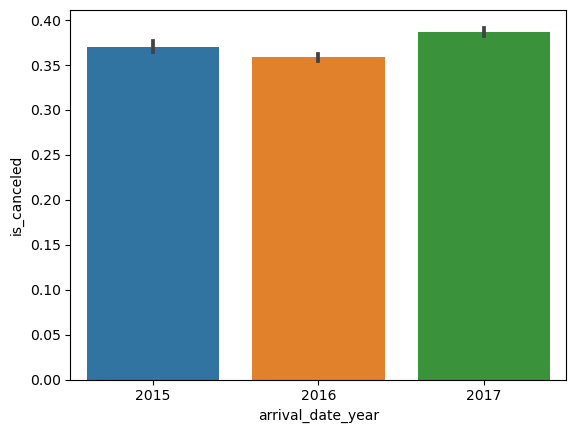

In [21]:
sns.barplot(data=hotel_df, x='arrival_date_year', y='is_canceled')
plt.show()

In [22]:
import calendar

In [23]:
months = []
for m in calendar.month_name:
    months.append(m)
months = months[1:]
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

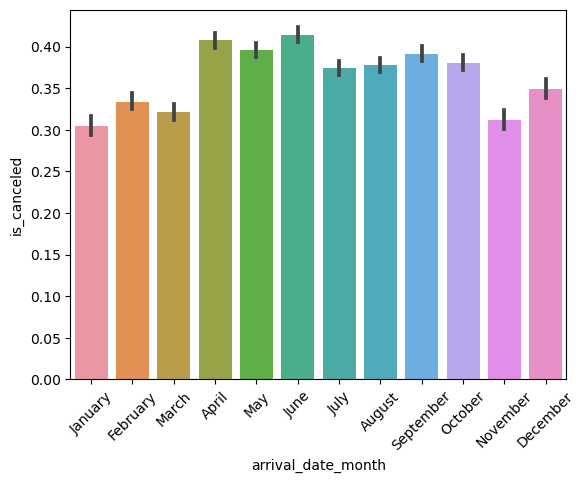

In [24]:
sns.barplot(data=hotel_df, x='arrival_date_month', y='is_canceled', order=months)
plt.xticks(rotation=45)
plt.show()

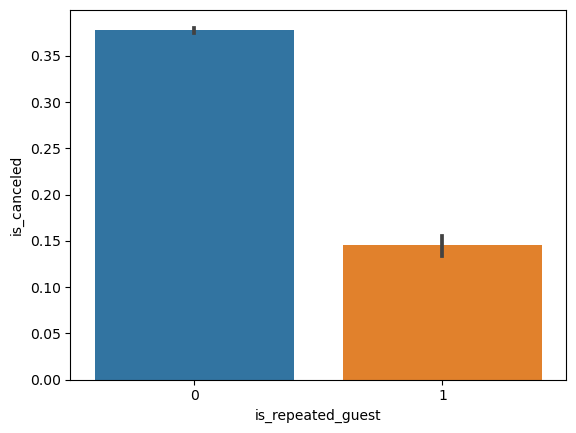

In [25]:
sns.barplot(data=hotel_df, x='is_repeated_guest', y='is_canceled')
plt.show()

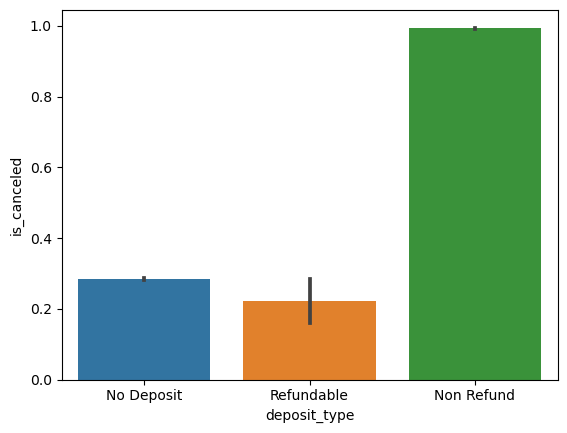

In [26]:
sns.barplot(data=hotel_df, x='deposit_type', y='is_canceled')
plt.show()

In [27]:
hotel_df['deposit_type'].value_counts()

No Deposit    104640
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [28]:
corr = hotel_df.corr(numeric_only=True)
corr

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293130,0.016668,-0.001771,0.024777,0.060019,0.005046,-0.032492,-0.084769,0.110132,-0.057350,-0.144368,0.054185,0.047544,-0.195500,-0.234663
lead_time,0.293130,1.000000,0.040134,0.085653,0.165789,0.119517,-0.037620,-0.020914,-0.124465,0.086043,-0.073558,0.000129,0.170086,-0.063063,-0.116449,-0.095707
arrival_date_year,0.016668,0.040134,1.000000,0.021468,0.030866,0.029633,0.054627,-0.013191,0.010288,-0.119822,0.029206,0.030846,-0.056496,0.197606,-0.013682,0.108540
stays_in_weekend_nights,-0.001771,0.085653,0.021468,1.000000,0.498948,0.091868,0.045801,0.018486,-0.087396,-0.012772,-0.042749,0.063216,-0.054150,0.049400,-0.018548,0.072692
stays_in_week_nights,0.024777,0.165789,0.030866,0.498948,1.000000,0.092973,0.044208,0.020193,-0.097343,-0.013991,-0.048763,0.096172,-0.002018,0.065273,-0.024856,0.068204
adults,0.060019,0.119517,0.029633,0.091868,0.092973,1.000000,0.030447,0.018146,-0.146456,-0.006738,-0.107986,-0.051680,-0.008283,0.230650,0.014785,0.122885
children,0.005046,-0.037620,0.054627,0.045801,0.044208,0.030447,1.000000,0.024029,-0.032852,-0.024730,-0.021070,0.048956,-0.033273,0.324855,0.056252,0.081743
babies,-0.032492,-0.020914,-0.013191,0.018486,0.020193,0.018146,0.024029,1.000000,-0.008940,-0.007501,-0.006550,0.083444,-0.010621,0.029185,0.037383,0.097889
is_repeated_guest,-0.084769,-0.124465,0.010288,-0.087396,-0.097343,-0.146456,-0.032852,-0.008940,1.000000,0.082308,0.418054,0.011968,-0.022232,-0.134235,0.077111,0.013085
previous_cancellations,0.110132,0.086043,-0.119822,-0.012772,-0.013991,-0.006738,-0.024730,-0.007501,0.082308,1.000000,0.152730,-0.026991,0.005929,-0.065649,-0.018492,-0.048385


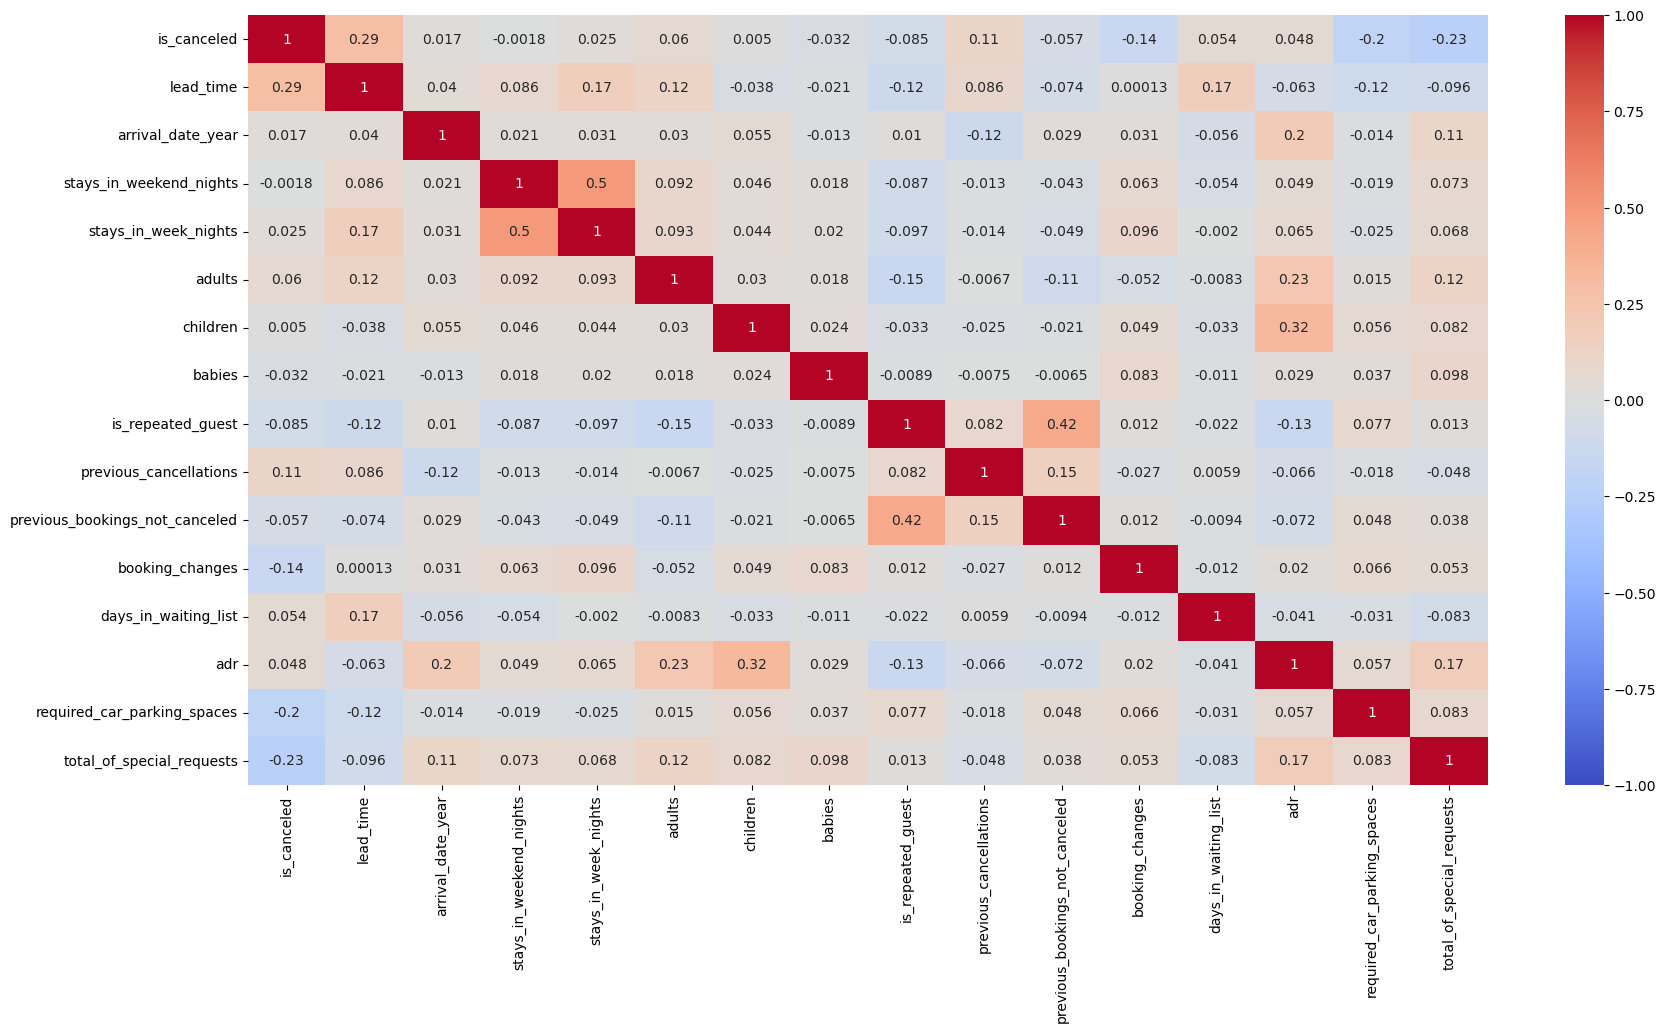

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(data=corr, cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()

In [30]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,0,1,1,0.0,0,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,0,2,2,0.0,0,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


## 결측치 처리

In [31]:
hotel_df.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_ca

In [32]:
hotel_df = hotel_df.dropna()

In [33]:
# adults, children, babies가 모두 0인 경우 결측치인가?
# feature 엔지니어링 할때 처리
hotel_df[hotel_df['adults']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,1,2015,October,0,3,0,0.0,0,...,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0
2409,Resort Hotel,0,0,2015,October,0,0,0,0.0,0,...,0,A,I,0,No Deposit,0,Transient,0.00,0,0
3181,Resort Hotel,0,36,2015,November,1,2,0,0.0,0,...,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0
3684,Resort Hotel,0,165,2015,December,1,4,0,0.0,0,...,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0
3708,Resort Hotel,0,165,2015,December,2,4,0,0.0,0,...,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,1,3,0,2.0,0,...,0,B,A,0,No Deposit,0,Transient,98.85,0,1
117274,City Hotel,0,276,2017,July,2,1,0,2.0,0,...,0,B,B,1,No Deposit,0,Transient,93.64,0,2
117303,City Hotel,0,291,2017,July,2,2,0,2.0,0,...,0,B,A,0,No Deposit,0,Transient,98.85,0,1
117453,City Hotel,0,159,2017,July,1,3,0,2.0,0,...,0,A,A,1,No Deposit,0,Transient,121.88,0,1


## 피쳐 엔지니어링

In [34]:
hotel_df['people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']
hotel_df[hotel_df['people']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people
2224,Resort Hotel,0,1,2015,October,0,3,0,0.0,0,...,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,0.0
2409,Resort Hotel,0,0,2015,October,0,0,0,0.0,0,...,A,I,0,No Deposit,0,Transient,0.00,0,0,0.0
3181,Resort Hotel,0,36,2015,November,1,2,0,0.0,0,...,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,0.0
3684,Resort Hotel,0,165,2015,December,1,4,0,0.0,0,...,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,0.0
3708,Resort Hotel,0,165,2015,December,2,4,0,0.0,0,...,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,0,3,0,0.0,0,...,A,A,1,No Deposit,0,Transient,100.80,0,0,0.0
115091,City Hotel,0,1,2017,June,0,1,0,0.0,0,...,E,K,0,No Deposit,0,Transient,0.00,1,1,0.0
116251,City Hotel,0,44,2017,July,1,1,0,0.0,0,...,A,K,2,No Deposit,0,Transient,73.80,0,0,0.0
116534,City Hotel,0,2,2017,July,2,5,0,0.0,0,...,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,0.0


In [35]:
hotel_df = hotel_df[hotel_df['people']!=0]
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118727 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118727 non-null  object 
 1   is_canceled                     118727 non-null  int64  
 2   lead_time                       118727 non-null  int64  
 3   arrival_date_year               118727 non-null  int64  
 4   arrival_date_month              118727 non-null  object 
 5   stays_in_weekend_nights         118727 non-null  int64  
 6   stays_in_week_nights            118727 non-null  int64  
 7   adults                          118727 non-null  int64  
 8   children                        118727 non-null  float64
 9   babies                          118727 non-null  int64  
 10  meal                            118727 non-null  object 
 11  country                         118727 non-null  object 
 12  distribution_cha

In [36]:
hotel_df['total_nights'] = hotel_df['stays_in_week_nights']+hotel_df['stays_in_weekend_nights']
hotel_df[hotel_df['total_nights']==0] # 이상하지만 확인만 하고 제거하진 않음

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0
167,Resort Hotel,0,111,2015,July,0,0,2,0.0,0,...,H,0,No Deposit,0,Transient,0.0,0,2,2.0,0
168,Resort Hotel,0,0,2015,July,0,0,1,0.0,0,...,H,0,No Deposit,0,Transient,0.0,0,0,1.0,0
196,Resort Hotel,0,8,2015,July,0,0,2,0.0,0,...,A,0,No Deposit,0,Transient,0.0,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,0,0,1,0.0,0,...,A,0,No Deposit,0,Transient-Party,0.0,0,0,1.0,0
117701,City Hotel,0,0,2017,August,0,0,2,0.0,0,...,A,0,No Deposit,0,Transient,0.0,0,0,2.0,0
118029,City Hotel,0,0,2017,August,0,0,2,0.0,0,...,A,0,No Deposit,0,Transient,0.0,0,0,2.0,0
118631,City Hotel,0,78,2017,August,0,0,1,0.0,0,...,K,7,No Deposit,0,Transient-Party,0.0,0,0,1.0,0


In [37]:
hotel_df['season'] = hotel_df['arrival_date_month'].apply(lambda m:
                                     'spring' if m in ['March', 'April', 'May'] else
                                     'summer' if m in ['Jun', 'July', 'August'] else
                                     'fall' if m in ['September','October','November'] else
                                     'winter'
)

In [38]:
# if문이 싫으면 season dic을 만들고 넣어주는 방법이 있으나 위가 단순함
season_dic = {'spring':[3,4,5], 'summer':[6,7,8], 'fall':[9,10,11], 'winter':[12,1,2]}
new_season_dic = {}
for season in season_dic:
    for month in season_dic[season]:
        new_season_dic[calendar.month_name[month]] = season
new_season_dic

{'March': 'spring',
 'April': 'spring',
 'May': 'spring',
 'June': 'summer',
 'July': 'summer',
 'August': 'summer',
 'September': 'fall',
 'October': 'fall',
 'November': 'fall',
 'December': 'winter',
 'January': 'winter',
 'February': 'winter'}

In [39]:
hotel_df['expected_room_type'] = (hotel_df['reserved_room_type']==hotel_df['assigned_room_type']).astype(int)

In [40]:
hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])
hotel_df[hotel_df['cancel_rate']>0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights,season,expected_room_type,cancel_rate
13825,Resort Hotel,0,6,2016,March,1,0,1,0.0,0,...,0,Transient,40.0,0,0,1.0,1,spring,1,0.500000
13826,Resort Hotel,0,7,2016,June,0,1,1,0.0,0,...,0,Transient,65.0,0,0,1.0,1,winter,1,0.333333
13827,Resort Hotel,0,8,2016,September,0,2,2,0.0,0,...,0,Transient,65.0,0,0,2.0,2,fall,1,0.250000
13855,Resort Hotel,0,5,2015,November,0,1,1,0.0,0,...,0,Transient,25.0,0,0,1.0,1,fall,1,0.500000
13856,Resort Hotel,0,0,2015,December,0,1,1,0.0,0,...,0,Transient,25.0,0,0,1.0,1,winter,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,City Hotel,0,10,2017,June,0,1,1,0.0,0,...,0,Transient,65.0,0,0,1.0,1,winter,1,0.200000
111357,City Hotel,0,20,2017,July,0,3,1,0.0,0,...,0,Transient,65.0,0,0,1.0,3,summer,1,0.166667
111358,City Hotel,0,8,2017,July,0,1,1,0.0,0,...,0,Transient,65.0,1,0,1.0,1,summer,1,0.142857
111359,City Hotel,0,13,2017,August,0,1,1,0.0,0,...,0,Transient,65.0,0,0,1.0,1,summer,1,0.125000


In [41]:
hotel_df['cancel_rate'] = hotel_df['cancel_rate'].fillna(-99)

In [42]:
hotel_df['cancel_rate'] # linear 모델에서는 문제에선 문제될수 있음

0        -99.0
1        -99.0
2        -99.0
3        -99.0
4        -99.0
          ... 
119385   -99.0
119386   -99.0
119387   -99.0
119388   -99.0
119389   -99.0
Name: cancel_rate, Length: 118727, dtype: float64

## 더미 변수 만들기

In [43]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [44]:
object_df = hotel_df.loc[:, hotel_df.dtypes == 'object']

In [45]:
for o in object_df:
    print(o, object_df[o].nunique())

hotel 2
arrival_date_month 12
meal 5
country 177
distribution_channel 5
reserved_room_type 9
assigned_room_type 11
deposit_type 3
customer_type 4
season 4


In [46]:
hotel_df = hotel_df.drop('country', axis=1)

In [47]:
object_df = hotel_df.loc[:, hotel_df.dtypes == 'object']
for o in object_df:
    print(o, object_df[o].nunique())

hotel 2
arrival_date_month 12
meal 5
distribution_channel 5
reserved_room_type 9
assigned_room_type 11
deposit_type 3
customer_type 4
season 4


In [48]:
hotel_df['meal'].value_counts()

BB           91788
HB           14429
SC           10547
Undefined     1165
FB             798
Name: meal, dtype: int64

In [49]:
hotel_df = pd.get_dummies(data=hotel_df, columns=hotel_df.columns[hotel_df.dtypes == 'object'])

In [50]:
hotel_df.head()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,season_fall,season_spring,season_summer,season_winter
0,0,342,2015,0,0,2,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,737,2015,0,0,2,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,7,2015,0,1,1,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,13,2015,0,1,1,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,14,2015,0,2,2,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## modeling

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    hotel_df.drop('is_canceled', axis=1),
    hotel_df['is_canceled'],
    test_size = 0.4,
    random_state=100
)
print(len(X_train), len(X_test), len(y_train), len(y_test))

71236 47491 71236 47491


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
pred1 = rf.predict(X_test)

In [57]:
proba1 = rf.predict_proba(X_test)
proba1

array([[0.89, 0.11],
       [0.82, 0.18],
       [0.92, 0.08],
       ...,
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.  , 1.  ]])

In [58]:
proba1 = proba1[:, 1]

In [59]:
from IPython.core.display_functions import display

display(len(proba1))
proba1

47491

array([0.11, 0.18, 0.08, ..., 1.  , 0.02, 1.  ])

In [60]:
from IPython.core.display_functions import display

display(len(pred1))
pred1

47491

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [62]:
accuracy_score(y_test, pred1)

0.8566044092564907

In [63]:
confusion_matrix(y_test, pred1)

array([[27528,  2391],
       [ 4419, 13153]], dtype=int64)

In [64]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     29919
           1       0.85      0.75      0.79     17572

    accuracy                           0.86     47491
   macro avg       0.85      0.83      0.84     47491
weighted avg       0.86      0.86      0.85     47491



In [65]:
roc_auc_score(y_test, proba1)

0.9236118841533798

## AUC score

* confusion matrix
    * ![confusion](images/confusion.PNG)
### Precision
* 1이라고 예측한 것 중, 얼마 만큼 제대로 맞추었는가?
* type1 에러와 관련
* ![precision](images/precision.PNG)
### Recall
* 실제 1인것 중, 얼마 만큼 제대로 맞추었는가?
* type2 에러와 관련
* ![recall](images/recall.PNG)
### F-1 Score
* Precision과 Recall의 조화 평균
* ![f-1 Score](images/f1.PNG)
### FPR
* False Positive Rate
* ![FPR](images/FPR.PNG)
### TPR
* True Positive Rate
* ![TPR](images/TPR.PNG)
### ROC Curve
* ![ROC Curve](images/roc.PNG)
* threshold를 바꿔가며 TPR과 FPR의 변화를 그린 그래프
    * ROC Curve를 그릴땐 예측값이 아닌 확률이 들어간다.
### AUC
* Area Under the Curve
    * ROC Curve의 아래 면적값
    * 0.5 ~ 1.0 사이의 값을 가짐(좋은 모델일수록 1에 가까움)

## 하이퍼 파라미터 튜닝

In [66]:
rf2 = RandomForestClassifier(max_depth=10, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.8869225933466752

In [67]:
rf2 = RandomForestClassifier(max_depth=30, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.9263580679139543

In [68]:
rf2 = RandomForestClassifier(max_depth=50, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.9238865863166311

In [69]:
rf2 = RandomForestClassifier(min_samples_split=3, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.924645297900355

In [70]:
rf2 = RandomForestClassifier(min_samples_split=5, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.9257359893717741

In [71]:
rf2 = RandomForestClassifier(min_samples_split=7, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.9256819033592689

In [72]:
rf2 = RandomForestClassifier(max_depth=30, min_samples_split=5, random_state=100)
rf2.fit(X_train, y_train)
proba2 = rf2.predict_proba(X_test)
roc_auc_score(y_test, proba2[:, 1])

0.9259555146722237

## 그리드 서치

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
params = {
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2,3,5,7]
}

In [75]:
rf3 = RandomForestClassifier(random_state=100)

In [76]:
grid_df = GridSearchCV(rf3, params, cv = 3) # cv : cross validation, X_train을 쪼갬

In [77]:
grid_df.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': [None, 10, 30, 50],
                         'min_samples_split': [2, 3, 5, 7]})

In [78]:
grid_df.best_params_

{'max_depth': 50, 'min_samples_split': 5}

In [79]:
proba3 = grid_df.predict_proba(X_test)
proba3

array([[0.60561905, 0.39438095],
       [0.74880556, 0.25119444],
       [0.90325   , 0.09675   ],
       ...,
       [0.        , 1.        ],
       [0.93883333, 0.06116667],
       [0.        , 1.        ]])

In [80]:
roc_auc_score(y_test, proba3[:, 1])

0.9256961519374182

## 피쳐 임포턴스

In [81]:
rf4 = RandomForestClassifier(max_depth=50, min_samples_split=3, random_state=100)

In [82]:
rf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=3, random_state=100)

In [83]:
proba4 = rf4.predict_proba(X_test)

In [84]:
roc_auc_score(y_test,proba4[:, 1])

0.9246276959323674

In [85]:
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importancies': rf4.feature_importances_})

In [86]:
top10 = feat_imp.sort_values(by='importancies', ascending=False).head(10)
top10

,feature,importancies
0,lead_time,0.160994
12,adr,0.114334
64,deposit_type_Non Refund,0.095424
63,deposit_type_No Deposit,0.072324
14,total_of_special_requests,0.060555
16,total_nights,0.042963
3,stays_in_week_nights,0.039702
18,cancel_rate,0.032311
17,expected_room_type,0.027416
2,stays_in_weekend_nights,0.026781


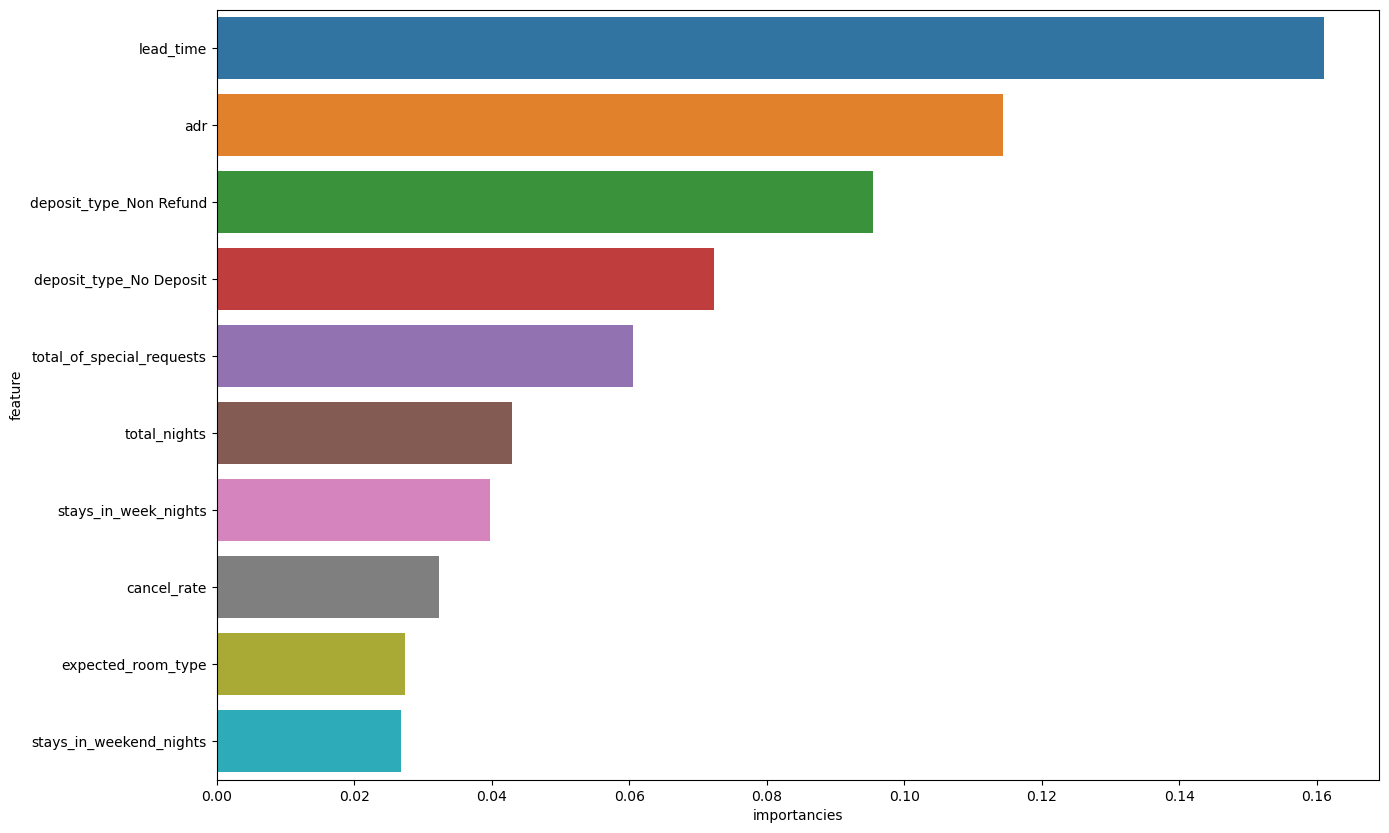

In [87]:
plt.figure(figsize=(15,10))
sns.barplot(data=top10, x='importancies', y='feature')
plt.show()

## Random Forest
### Ensemble 기법
* ![random forest](images/randomforest.PNG)
* 복원 추출을 통한 여개의 Subset 사용 -> Bagging
    * ![bootstrap + bagging](images/bootstrap_bagging.PNG)
    * Bagging기법
        * Bootstrap을 통한 데이터 추출하고 추출된 데이터를 통해 모델을 만듬
            * Bootstrap이란 복원 추출 기법
* 일부의 피처(독립변수)만 사용
    * ![random feature](images/random_feature.PNG)
* 각 트리는 서로 독립적이다